# **Extracting the patch without hair and background**

One of the problems we faced was the exctraction of the cheek region patches with background, the background was affecting our final accuracy of the model as we only needed the region of the skin for acne detection. The following code solves that probelm and results in a png file that can be processed by the Acne Analyzer Model.


## Before:  

# 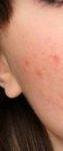


## After:
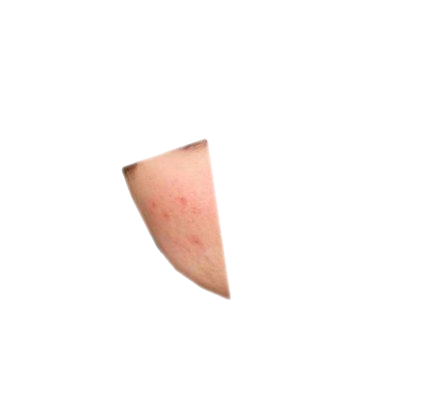

# Defining the needed functions

In [10]:
# a method that takes the image, applies the mask on the given facial landmark points
def mask_image(image, pts):
  mask = np.ones(image.shape, dtype=np.uint8)
  mask.fill(255)
  cv2.fillPoly(mask, [pts], 0)
  masked_image = cv2.bitwise_or(image, mask)
  return masked_image

def remove_bg(masked_image):
  #removing the white background
  # load image
  img = masked_image
  # convert to graky
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # threshold input image as mask
  mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]
  # negate mask
  mask = 255 - mask
  # apply morphology to remove isolated extraneous noise
  # use borderconstant of black since foreground touches the edges
  kernel = np.ones((3,3), np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  # anti-alias the mask -- blur then stretch
  # blur alpha channel
  mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
  # linear stretch so that 127.5 goes to 0, but 255 stays 255
  mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)
  # put mask into alpha channel
  result = img.copy()
  result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
  result[:, :, 3] = mask
  return result

# Extracting the left cheek and right cheek patch from a facial image

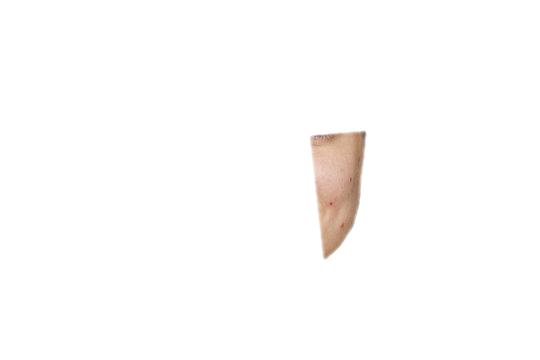

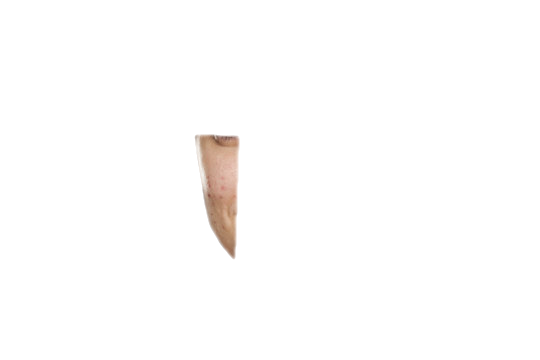

In [16]:
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Data Patch extraction/testing/testing_images/moderate.jpg')
p = "/content/drive/MyDrive/TestingNewModel/nestle-acne-assessment/models/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face = detector(gray)

for face in face:
  x1=face.left()
  y1=face.top()
  x2=face.right()
  y2=face.bottom()

landmarks=predictor(gray, face)

#defining the particular points on the face landmark model that will be used to draw a a shape from which the facial data will be collected

#points for the right cheek
x0, x1, x2, x3, x4, x5, x6 = landmarks.part(0).x, landmarks.part(1).x, landmarks.part(2).x, landmarks.part(3).x,  landmarks.part(4).x,  landmarks.part(5).x, landmarks.part(6).x
y0, y1, y2, y3, y4, y5, y6 = landmarks.part(0).y, landmarks.part(1).y, landmarks.part(2).y, landmarks.part(3).y,  landmarks.part(4).y,  landmarks.part(5).y, landmarks.part(6).y

l1, l2 = landmarks.part(40).x, landmarks.part(40).y

#extracting right cheek
pts = np.array([[x0, y0], [x1, y1], [x2, y2],[x3, y3], [x4, y4],[x5, y5], [x6, y6], [l1, l2] ], np.int32)

masked_image =  mask_image(image, pts)

final_image_rc = remove_bg(masked_image)

#points for the left cheek

x0, x1, x2, x3, x4, x5, x6 = landmarks.part(10).x, landmarks.part(11).x, landmarks.part(12).x, landmarks.part(13).x,  landmarks.part(14).x,  landmarks.part(15).x, landmarks.part(16).x
y0, y1, y2, y3, y4, y5, y6 = landmarks.part(10).y, landmarks.part(11).y, landmarks.part(12).y, landmarks.part(13).y,  landmarks.part(14).y,  landmarks.part(15).y, landmarks.part(16).y

l1, l2 = landmarks.part(47).x, landmarks.part(47).y

#extracting right cheek

pts = np.array([[x0, y0], [x1, y1], [x2, y2],[x3, y3], [x4, y4],[x5, y5], [x6, y6], [l1, l2] ], np.int32)

masked_image =  mask_image(image, pts)

final_image_lc = remove_bg(masked_image)

# displaying the resultant images
cv2_imshow(final_image_lc)
cv2_imshow(final_image_rc)

In [17]:
# Saving the Images
import os
os.chdir('/content/drive/MyDrive/data')
cv2.imwrite('mild_lc.png', final_image_lc)
cv2.imwrite('mild_rc.png', final_image_rc)

True